In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('data/model_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41185 non-null  int64  
 1   job               41185 non-null  object 
 2   marital           41185 non-null  object 
 3   education         41185 non-null  object 
 4   default           41185 non-null  object 
 5   housing           41185 non-null  object 
 6   loan              41185 non-null  object 
 7   contact           41185 non-null  object 
 8   month             41185 non-null  object 
 9   day_of_week       41185 non-null  object 
 10  campaign          41185 non-null  int64  
 11  contacted_before  41185 non-null  int64  
 12  previous          41185 non-null  int64  
 13  poutcome          41185 non-null  object 
 14  emp.var.rate      41185 non-null  float64
 15  cons.price.idx    41185 non-null  int64  
 16  cons.conf.idx     41185 non-null  int64 

In [69]:
data = data.apply(LabelEncoder().fit_transform)



In [70]:

X=data.drop(labels=['subscribed'], axis=1)
y=data['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [71]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)


RandomForestRegressor(random_state=0)

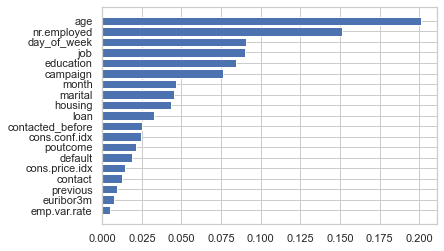

In [73]:
f_i = list(zip(rf.feature_names_in_,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

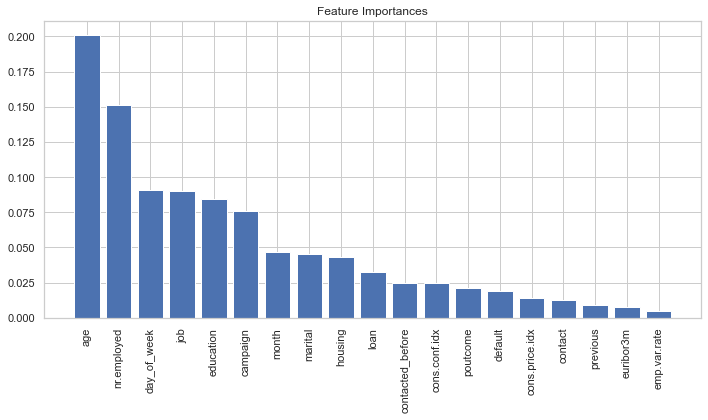

In [76]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
feature_names = X.columns  # Assuming X is a pandas DataFrame
sorted_feature_names = feature_names[indices]

# Display feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.tight_layout()
plt.show()